In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv'
)

In [5]:
X_K = df.iloc[:,[3, 4]].values #for k means
X_hc = df.iloc[:, [3, 4]] # for hierachial clusters... so the X doesn't get mixed up in same notebook

###**K-means clustering**

# Elbow method to find the obtimal clusters

Text(0.5, 1.0, 'elbows vs range of clusters')

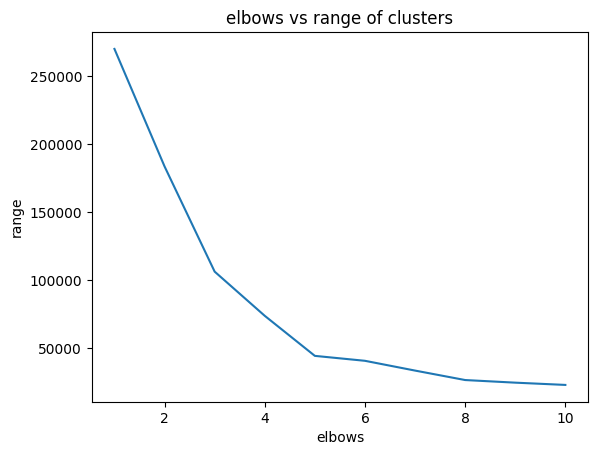

In [13]:
from sklearn.cluster import KMeans
elbows = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X_K)
  elbows.append(kmeans.inertia_)

plt.plot(range(1, 11), elbows)
plt.xlabel("elbows")
plt.ylabel('range')
plt.title('elbows vs range of clusters')

###seems like 5 or 6 would be optimal kernels

In [15]:
k_means = KMeans(n_clusters = 6, init='k-means++', random_state=42)
y_Kpred = k_means.fit_predict(X_K)

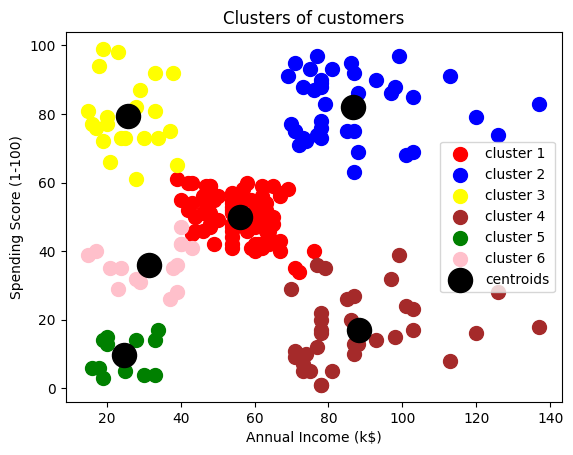

In [20]:
plt.scatter(X_K[y_Kpred == 0, 0], X_K[y_Kpred == 0, 1], s=100, c='red', label='cluster 1')
plt.scatter(X_K[y_Kpred == 1, 0], X_K[y_Kpred == 1, 1], s=100, c='blue', label='cluster 2')
plt.scatter(X_K[y_Kpred == 2, 0], X_K[y_Kpred == 2, 1], s=100, c='yellow', label='cluster 3')
plt.scatter(X_K[y_Kpred == 3, 0], X_K[y_Kpred == 3, 1], s=100, c='brown', label='cluster 4')
plt.scatter(X_K[y_Kpred == 4, 0], X_K[y_Kpred == 4, 1], s=100, c='green', label='cluster 5')
plt.scatter(X_K[y_Kpred == 5, 0], X_K[y_Kpred == 5, 1], s=100, c='pink', label='cluster 6')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=300, c='black', label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


#**heirachial clustering**

#the dendrogram to find the optimal number of clusters

In [21]:
from scipy.cluster import hierarchy

Text(0, 0.5, 'Euclidean distances')

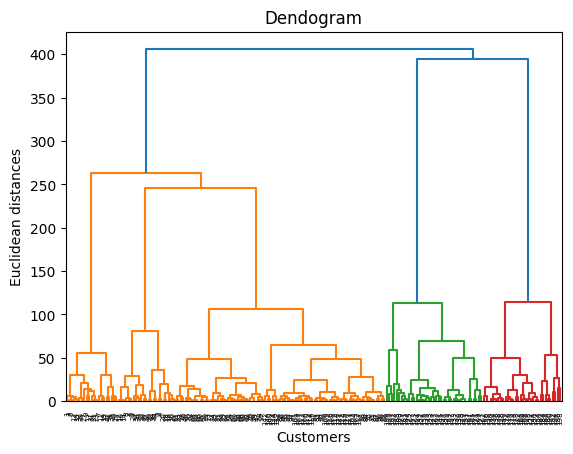

In [26]:
dendogram = hierarchy.dendrogram(hierarchy.linkage(X_hc, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')





In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


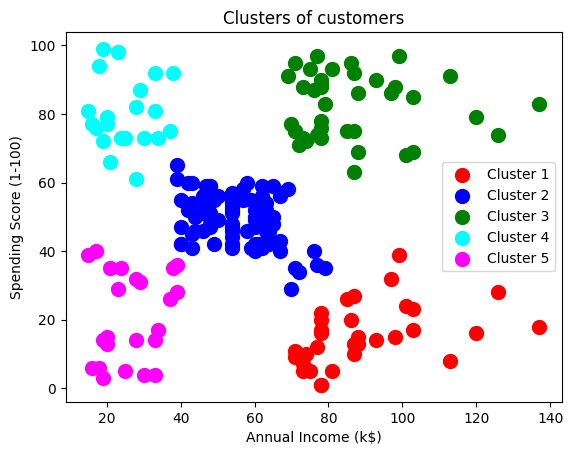

In [29]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()